In [1]:
# Whale and Rival Analysis

In [2]:
"""
Notes for Instructor Grader (IG), Please

In terms of citations, in general, 99.99% of work presented inspired by office hours with Instructor GS, 
Instructor AN, Instructor KS, tutor (Ms. LT), and refresher notebooks.
help for cumprod method from https://stackoverflow.com/questions/40811246/pandas-cumulative-return-function
help for Boolean risk from  https://www.e-education.psu.edu/geog489/book/export/html/2047 

The student author apologizes profusely for any confusion (the student author is me, 
Franklin Bueno). In order to to jump directly to answers from the Whale Analysis Cells (WAC) by searching
(i.e., simultaneously pressing 'CTRL' and 'F' keys) and searching for WAC (or WAT for Whale Analysis Text or RDM
for ReadMe questions). The student author felt compelled to do this because there were so many questions
interspersed among the README, the starter cells, and the starter markdown.

In terms of Whale Analysis Text (WAT) questions, there were seven (7) questions according to the count of the 
student author.

1 Does any portfolio outperform the S&P 500? (of the given whales and algorithms) WAT 1
It is hard to tell anything from the daily returns graph alone.
From the cumulative returns table and graph, the student author is identifying Berkshire and Algo 1 as
outperforming the S&P 500.

2 Plot the rolling standard deviation of the various portfolios along with the 
rolling standard deviation of the S&P 500 (consider a 21 day window). 
Does the risk increase for each of the portfolios at the same time risk increases in the S&P? WAT 2
Based on the two graphs above only, in general, except for the Tiger anomalies,
in terms of general direction, the portfolios go along with the S&P. Greater risk corresponds with greater standard deviation.
Therefore, in general, the porfolios generally go along with the S&P in terms of risk.

3 Which returns most closely mimic the S&P? WAT 3
Based on the S&P row, Algo 2 is the closest mimic, Soros is the second closest, Berkshire is the third closest,
Paulson is the fourth closest, Tiger is the fifth closest, and Algo 1 is the farthest away. #abc67


4 Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. 
Does the portfolio seem sensitive to movements in the S&P 500? WAT 4

The student author did beta graphs for Berkshire and for Tiger. Berkshire seemed sensitive to movements in the S&P 500.
Tiger did not seem so sensitive to movements in the S&P 500 in later months. abc74

5 (After all, if you could invest in one of two portfolios, 
each offered the same 10% return, yet one offered lower risk, you'd take that one, right? WAT 5
Yes, the student author would take the portfolio with the lower risk. abc78

6 do our algo strategies outperform both 'the market' and the whales? WAT 6
WAT 6

It seems like Algo 1 outperforms both the S&P and all of the whales,
but it also looks like Algo 2 itself underperforms compared with the S&P and Berkshire. abc78

7 Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?
WAT 7 answered throughout every comparison with the FRANK HEDGE FUND


"""

"\nNotes for Instructor Grader (IG), Please\n\nIn terms of citations, in general, 99.99% of work presented inspired by office hours with Instructor GS, \nInstructor AN, Instructor KS, tutor (Ms. LT), and refresher notebooks.\nhelp for cumprod method from https://stackoverflow.com/questions/40811246/pandas-cumulative-return-function\nhelp for Boolean risk from  https://www.e-education.psu.edu/geog489/book/export/html/2047 \n\nThe student author apologizes profusely for any confusion (the student author is me, \nFranklin Bueno). In order to to jump directly to answers from the Whale Analysis Cells (WAC) by searching\n(i.e., simultaneously pressing 'CTRL' and 'F' keys) and searching for WAC (or WAT for Whale Analysis Text or RDM\nfor ReadMe questions). The student author felt compelled to do this because there were so many questions\ninterspersed among the README, the starter cells, and the starter markdown.\n\nIn terms of Whale Analysis Text (WAT) questions, there were seven (7) question

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
# satisfies WAC 1

In [4]:
whale_returns_data = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_whale_returns.csv")
sp_500_data = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_sp500_history.csv") 
google_data = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_goog_historical.csv")
cost_hist_data = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_cost_historical.csv")
algo_returns_data = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_algo_returns.csv")
aapl_data = Path("02-Homework_04-Pandas_Instructions_Starter_Code_Resources_aapl_historical.csv")
bsx_path = Path('BSX.csv')
abt_path = Path('ABT.csv')
ibm_path = Path('IBM.csv')
mrk_path = Path('MRK.csv')
# top line satisfies WAC 2
# algo_returns_data line is satisfying WAC 5

In [5]:
whale_set = pd.read_csv(whale_returns_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
# here, just reading whale returns, data not cleaned yet...


In [6]:
whale_set.head(6)
# above line satisfies WAC 2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [7]:
# Read in CSV data
#Make sure you change the csv_path below to grab the right location of your data!
bsx_ticker_data = pd.read_csv(bsx_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
bsx_ticker_data.head()

,Close
Date,
2017-05-15,26.42
2017-05-16,26.48
2017-05-17,25.94
2017-05-18,26.14
2017-05-19,26.41


In [8]:
#breaker

In [9]:
"""

whale_returns_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_whale_returns.csv")
sp_500_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_sp500_history.csv") 
google_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_goog_historical.csv")
cost_hist_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_cost_historical.csv")
algo_returns_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_algo_returns.csv")
aapl_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_aapl_historical.csv")
# check
"""


'\n\nwhale_returns_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_whale_returns.csv")\nsp_500_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_sp500_history.csv") \ngoogle_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_goog_historical.csv")\ncost_hist_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_cost_historical.csv")\nalgo_returns_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_algo_returns.csv")\naapl_data = Path("C:/Users/Frank/Downloads/02-Homework_04-Pandas_Instructions_Starter_Code_Resources_aapl_historical.csv")\n# check\n'

In [10]:
# whale_set = pd.read_csv(whale_returns_data)

In [11]:
whale_set = pd.read_csv(whale_returns_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
# here, just reading whale returns, data not cleaned yet...


In [12]:
whale_set.head(6)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [13]:
#sp_500_set = pd.read_csv(sp_500_data)
#sp_500_set.head(7)

In [14]:
sp_500_set = pd.read_csv(sp_500_data)
sp_500_set.sort_index(inplace=True)
sp_500_set.head(7)
sp_500_set.dtypes
# this cell satisfying WAC 9, check data types table below is a match with the homework

Date     object
Close    object
dtype: object

In [15]:
sp_500_set = pd.read_csv(sp_500_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_500_set.sort_index(inplace=True)
sp_500_set.head(7)
# reading S&P data wihtout cleaning, just to match
# this cell is satisfying WAC 8, reading S&P, table below is a match with the homework

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48


In [16]:
sp_500_set.dtypes
# this cell satisfying WAC 10, fix data types, table below is a match with the homework...

Close    object
dtype: object

In [17]:
sp_500_set.tail(14)

,Close
Date,
2019-04-03,$2873.40
2019-04-04,$2879.39
2019-04-05,$2892.74
2019-04-08,$2895.77
2019-04-09,$2878.20
2019-04-10,$2888.21
2019-04-11,$2888.32
2019-04-12,$2907.41
2019-04-15,$2905.58


In [18]:
sp_500_set.dtypes

Close    object
dtype: object

In [19]:
# remove "$" symbol
sp_500_set["Close"] = sp_500_set["Close"].str.replace("$", "")
sp_500_set.head(7)



,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
2012-10-08,1455.88
2012-10-09,1441.48


In [20]:
sp_500_set["Close"] = sp_500_set["Close"].astype(float)

In [21]:
sp_500_set.dtypes

Close    float64
dtype: object

In [22]:
# calculating daily returns for sp_500
daily_returns = sp_500_set.pct_change()
# daily returns checkpoint, satisfying WAC 11, and table below is a match with the homework
daily_returns.head(7)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891


In [23]:
# excising nulls
daily_returns.dropna(inplace=True)
daily_returns.head(7)
# satisfying WAC 12, table below is a match with the homework

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188


In [24]:
# renaming column
daily_returns = daily_returns.rename(columns={"Close" : "S&P"})

In [25]:
daily_returns.head()
#this point marks finish of S&P processing, data table below matches....
# satisfying WAC 13, table below is a match with the homework...

,S&P
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [26]:
google_set = pd.read_csv(google_data)
google_set.head(7)

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
5,GOOG,5/2/2019,1162.61
6,GOOG,5/1/2019,1168.08


In [27]:
cost_his_set = pd.read_csv(cost_hist_data)
cost_his_set.head(7)

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62
5,COST,5/2/2019,242.69
6,COST,5/1/2019,241.59


In [28]:
#algo_returns_set = pd.read_csv(algo_returns_data)
#algo_returns_set.head(7)

In [29]:
algo_returns_set = pd.read_csv(algo_returns_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_data = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

algo_returns_set.head(7)
# reading algo returns without any cleaning...
"""
this cell is satisfying WAC 5, reading algorithmic returns
table below is a match with the homework

"""

'\nthis cell is satisfying WAC 5, reading algorithmic returns\ntable below is a match with the homework\n\n'

In [30]:
# counting nulls for algo_returns_set
algo_returns_set.isnull().sum()
# this cell satisfying WAC 6, table below is a match with the homework...

Algo 1    0
Algo 2    6
dtype: int64

In [31]:
# dropping the nulls for algo_returns_set
algo_returns_set.dropna(inplace=True)

In [32]:
algo_returns_set.isnull().sum() 
#counting nulls in algo_returns after use of dropna method
# this cell satisfying WAC 7, table below is a match with the homework

Algo 1    0
Algo 2    0
dtype: int64

In [33]:
algo_returns_set.head(13)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


In [34]:
aapl_set = pd.read_csv(aapl_data)
aapl_set.head(7)

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75
5,AAPL,5/2/2019,209.15
6,AAPL,5/1/2019,210.52


In [35]:
whale_set.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [36]:
whale_set.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [37]:
whale_set

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [38]:
whale_set.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [39]:
whale_set.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [40]:
whale_set.shape

(1060, 4)

In [41]:
whale_set.isnull().sum() 
"""

above line satisfies WAC 3 (count nulls) and WAC 3 resultant table (give table of nulls per hedge fund), 
which is a match with the homework...
"""


'\n\nabove line satisfies WAC 3 (count nulls) and WAC 3 resultant table (give table of nulls per hedge fund), \nwhich is a match with the homework...\n'

In [42]:
whale_set.iloc[12]



SOROS FUND MANAGEMENT LLC      0.009603
PAULSON & CO.INC.              0.007513
TIGER GLOBAL MANAGEMENT LLC    0.009557
BERKSHIRE HATHAWAY INC         0.007854
Name: 2015-03-18 00:00:00, dtype: float64

In [43]:
whale_set.dropna(inplace=True) #dropping nulls in this cell

In [44]:
whale_set.isnull().sum() 
"""
this cell satisfies WAC 4, drop the nulls, 
and table below is a match with the homework

"""
# because of use lof dropna method, no more nulls, nulls dropped from whale data

'\nthis cell satisfies WAC 4, drop the nulls, \nand table below is a match with the homework\n\n'

In [45]:
whale_set.shape

(1059, 4)

In [46]:
combination_frame = pd.concat([whale_set, algo_returns_set, daily_returns], axis="columns", join="inner")

In [47]:
combination_frame.head(10)
# this combined table of whale, algorithmic, and S&P matches...
# this cell is satisfying WAC 14, and the table below is a match with the homework

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


In [48]:
"""
This cell is answering the Whale Analysis Text Question (WAT) 1

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 
It is hard to tell anything from the daily returns graph alone.
From the cumulative returns table and graph, the student author is identifying Berkshire and Algo 1 as
outperforming the S&P 500.

"""

'\nThis cell is answering the Whale Analysis Text Question (WAT) 1\n\nCalculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? \nIt is hard to tell anything from the daily returns graph alone.\nFrom the cumulative returns table and graph, the student author is identifying Berkshire and Algo 1 as\noutperforming the S&P 500.\n\n'

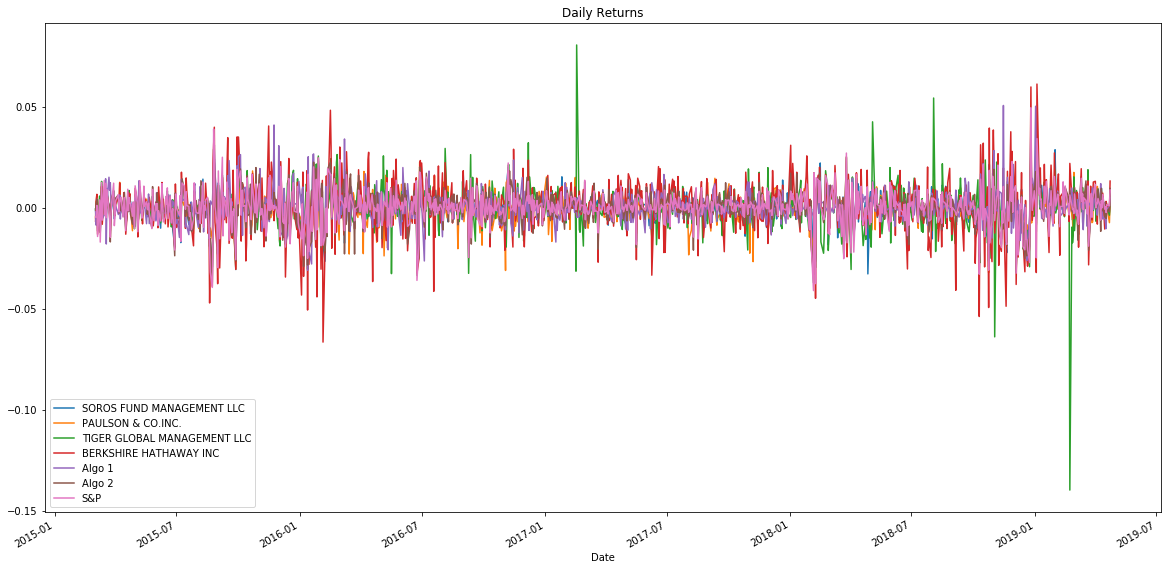

In [49]:
combination_frame.plot(figsize=(20,10), title="Daily Returns")
#the graph below pretty much matches the given graph in shape and in scale...
# this cell satisfying WAC 15, table below is a match with the homework

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2019-04-15,1.157839,0.786506,0.862797,1.525584,1.958591,1.264103,1.372246
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986
2019-04-22,1.156280,0.776939,0.855652,1.533046,1.925124,1.257151,1.373375
2019-04-23,1.164568,0.779646,0.861189,1.553401,1.934691,1.269247,1.385517


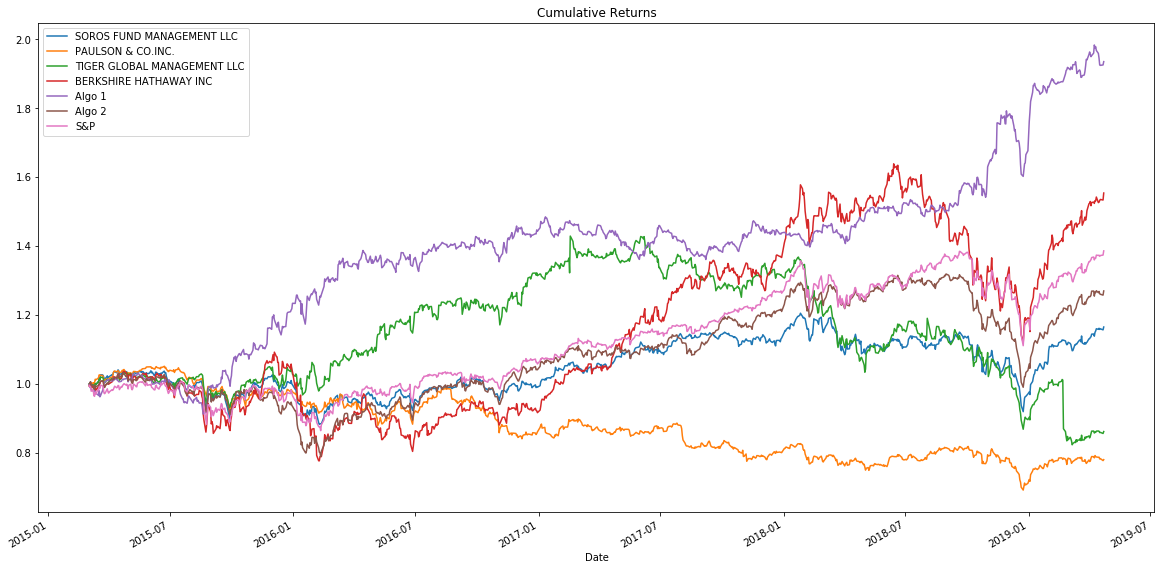

In [50]:
cumul_returns = (1 + combination_frame).cumprod() #cutting (-1) at the end of this, 
cumul_returns.plot(figsize=(20,10), title="Cumulative Returns")
# this cell is satisfying WAC 16, table below is a match with the homework
cumul_returns.tail(6)

In [51]:
"""
1. Calculate and plot cumulative returns. Does any portfolio outperform the S&P 500?
from the colors, it looks like Algo 1 and Berkshire outperform the S&P


"""

'\n1. Calculate and plot cumulative returns. Does any portfolio outperform the S&P 500?\nfrom the colors, it looks like Algo 1 and Berkshire outperform the S&P\n\n\n'

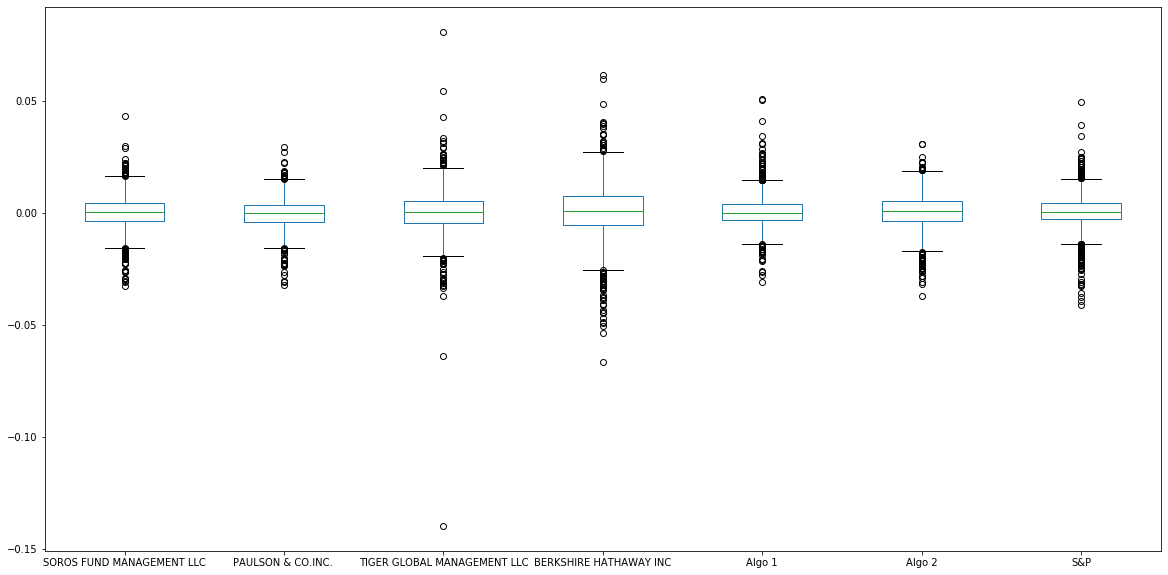

In [52]:
combination_frame.plot.box(figsize=(20,10))
# this cell satisfying WAC 18, plot below matches with the homework

In [53]:
"""
1. Create a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?
From the box plots, it looks like Tiger has the largest spread and Paulsonn and Algo 2 have the smallest spread, with Paulson most likely
having the smallest spread


"""

'\n1. Create a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?\nFrom the box plots, it looks like Tiger has the largest spread and Paulsonn and Algo 2 have the smallest spread, with Paulson most likely\nhaving the smallest spread\n\n\n'

In [54]:
daily_standard_dev = combination_frame.std()
# this cell satisfying WAC 19, table in cell 54 matches with the homework...

In [55]:
daily_standard_dev
#figuring out daily standard deviation,these numbers match

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P                            0.008554
dtype: float64

In [56]:
risker = daily_standard_dev["S&P"]

In [57]:
daily_standard_dev > risker 
#trying to find out what is riskier than S&P
# from https://www.e-education.psu.edu/geog489/book/export/html/2047 
# cell 55 and cell 56 satisfy WAC 20, table below matches with the homework, Berkshire and Tiger are riskier than the S&P

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P                            False
dtype: bool

In [58]:
"""

Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
These results align with the homework guide. The general rule is that the bigger the standard deviation,
the bigger the risk. Given an S&P standard deviation of 0.008554, anything with a bigger standard deviation than
this value is riskier. As a result, Tiger and Global are riskier than the S&P 500.


"""

'\n\nCalculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?\nThese results align with the homework guide. The general rule is that the bigger the standard deviation,\nthe bigger the risk. Given an S&P standard deviation of 0.008554, anything with a bigger standard deviation than\nthis value is riskier. As a result, Tiger and Global are riskier than the S&P 500.\n\n\n'

In [59]:
# annualized std
annualized_std = daily_standard_dev * np.sqrt(252)
annualized_std
# numbers below match table exactly...
# this cell is satisfying WAC 21, table below is a match with the homework

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P                            0.135786
dtype: float64

In [60]:
whale_set_rolling = whale_set.rolling(window=21).std()

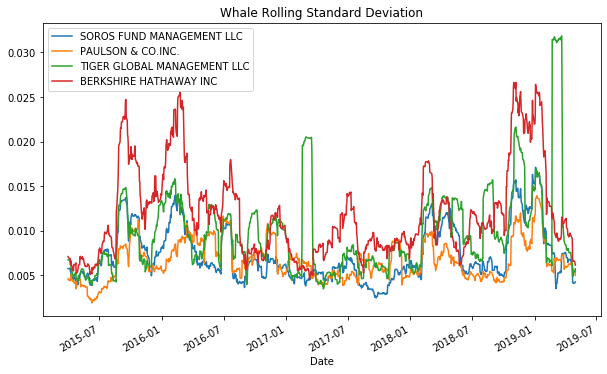

In [61]:
whale_set_rolling.plot(figsize=(10,6), title="Whale Rolling Standard Deviation")

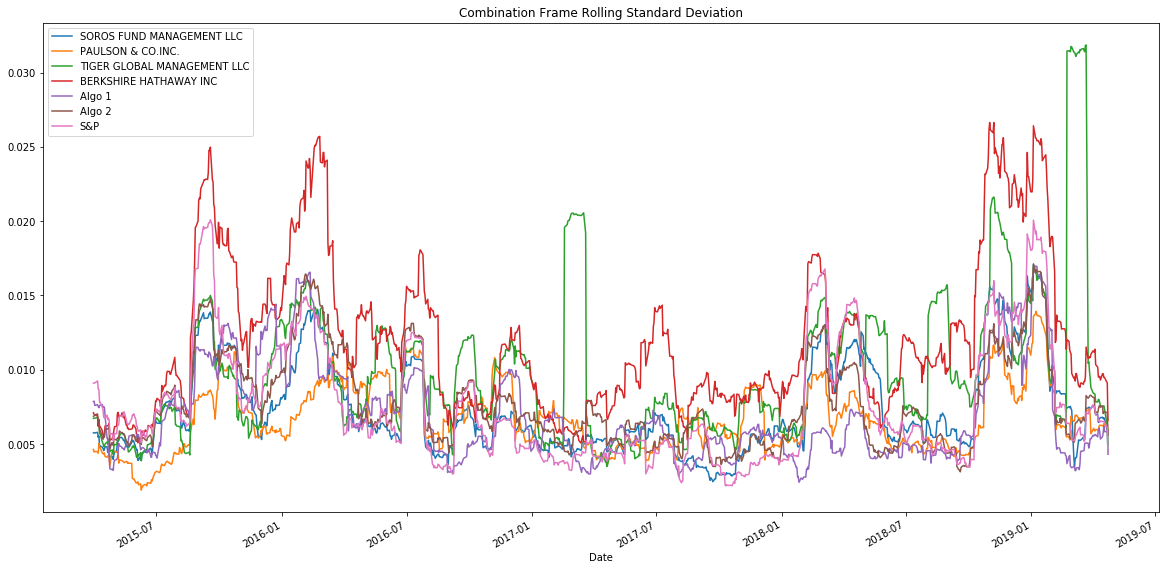

In [62]:
combination_frame_rolling = combination_frame.rolling(window=21).std()
combination_frame_rolling.plot(figsize=(20,10), title="Combination Frame Rolling Standard Deviation")
# satisfying WAC 22, graph below is a match with the homework

In [63]:
"""
Answering WAT 2
Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
Based on the two graphs above only, in general, except for the Tiger anomalies,
in terms of general direction, the portfolios go along with the S&P. Greater risk corresponds with greater standard deviation.
Therefore, in general, the porfolios generally go along with the S&P in terms of risk.

"""

'\nAnswering WAT 2\nDoes the risk increase for each of the portfolios at the same time risk increases in the S&P?\nBased on the two graphs above only, in general, except for the Tiger anomalies,\nin terms of general direction, the portfolios go along with the S&P. Greater risk corresponds with greater standard deviation.\nTherefore, in general, the porfolios generally go along with the S&P in terms of risk.\n\n'

In [64]:
correlation_table = combination_frame.corr()
correlation_table
# constructing correlation table, numbers match...
# this cell is satisfying WAC 23, the table below is a match with the homework

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [65]:
"""
WAT 3
Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
Based on the S&P row, Algo 2 is the closest mimic, Soros is the second closest, Berkshire is the third closest,
Paulson is the fourth closest, Tiger is the fifth closest, and Algo 1 is the farthest away.


"""

'\nWAT 3\nConstruct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?\nBased on the S&P row, Algo 2 is the closest mimic, Soros is the second closest, Berkshire is the third closest,\nPaulson is the fourth closest, Tiger is the fifth closest, and Algo 1 is the farthest away.\n\n\n'

In [66]:
"""
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
Based on the table, Algo 2 resembles the S&P the most, followed by Soros, Berkshire, Paulson, Tiger, and Algo 1.


"""

'\n2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?\nBased on the table, Algo 2 resembles the S&P the most, followed by Soros, Berkshire, Paulson, Tiger, and Algo 1.\n\n\n'

In [67]:
# llok for results

In [68]:
# beta for Berkshire vs S$P 500
berkshire_covariance = combination_frame["BERKSHIRE HATHAWAY INC"].cov(combination_frame["S&P"])
berkshire_variance = combination_frame["S&P"].var()
berkshire_beta = berkshire_covariance/berkshire_variance
print(berkshire_covariance)
print(berkshire_variance)
berkshire_beta
# need to check above

8.302834941861689e-05
7.316632424648712e-05


1.1347891297491723

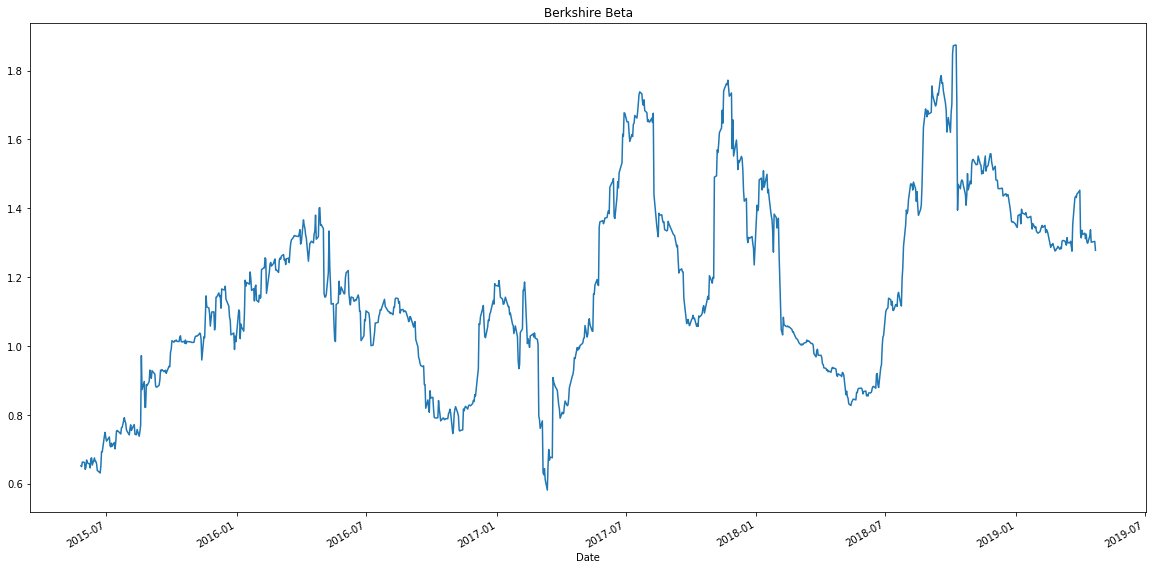

In [69]:
# graphs?
berkshire_covariance = combination_frame["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combination_frame["S&P"])
berkshire_variance = combination_frame["S&P"].rolling(window=60).var()
berkshire_beta = berkshire_covariance/berkshire_variance
berkshire_beta.plot(figsize=(20,10), title="Berkshire Beta")
# thanks to tutor, Ms. LT, looks almost exactly the same
#comparing Beta of Berkshire with S&P as example, trying to match homework
# this cell is satisfying WAC 24, reproducing Berkshire Beta

In [70]:
# beta for tiger vs S$P 500
tiger_covariance = combination_frame["TIGER GLOBAL MANAGEMENT LLC"].cov(combination_frame["S&P"])
tiger_variance = combination_frame["S&P"].var()
tiger_beta = tiger_covariance/tiger_variance
print(tiger_covariance)
print(tiger_variance)
tiger_beta
# need to check above

5.8141830323050995e-05
7.316632424648712e-05


0.7946528805681052

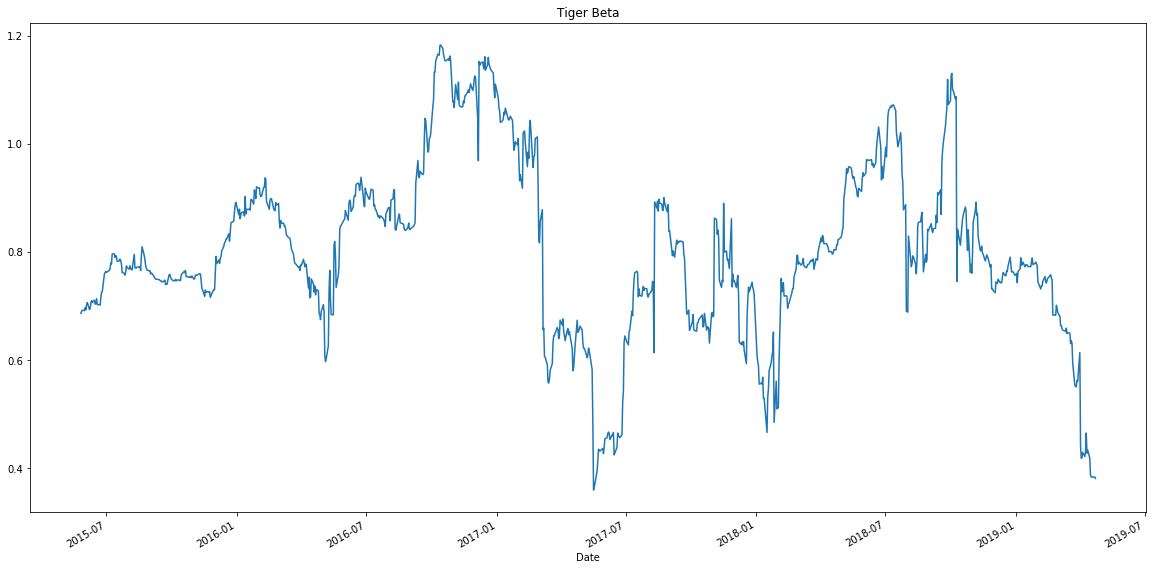

In [71]:
# graphs?
tiger_covariance = combination_frame["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(combination_frame["S&P"])
tiger_variance = combination_frame["S&P"].rolling(window=60).var()
tiger_beta = tiger_covariance/tiger_variance
tiger_beta.plot(figsize=(20,10), title="Tiger Beta")
# thanks to tutor, Ms. LT, looks almost exactly the same type, but this is for Tiger
#comparing Beta of Berkshire with S&P as example, trying to match homework
# this cell is satisfying WAC 24 but for Tiger

In [72]:
"""
WAT 4
Does the portfolio seem sensitive to movements in the S&P 500?
The student author did beta graphs for Berkshire and for Tiger. Berkshire seemed sensitive to movements in the S&P 500.
Tiger did not seem so sensitive to movements in the S&P 500 in later months.

"""

'\nWAT 4\nDoes the portfolio seem sensitive to movements in the S&P 500?\nThe student author did beta graphs for Berkshire and for Tiger. Berkshire seemed sensitive to movements in the S&P 500.\nTiger did not seem so sensitive to movements in the S&P 500 in later months.\n\n'

In [73]:
"""
3. Choose one portfolio and 
plot a rolling beta between that portfolio's returns and S&P 500 returns. 
Does the portfolio seem sensitive to movements in the S&P 500?

Berkshire was done to reproduce the homework. Thanks to the Tutor, Ms. LT, the student-author was 
able to reproduce the homework. The student-author continued for Tiger. 
The calculated beta value for Tiger is about .974. This means relative sensitivity to S&P in a corresponding (1:1) scale...

"""

"\n3. Choose one portfolio and \nplot a rolling beta between that portfolio's returns and S&P 500 returns. \nDoes the portfolio seem sensitive to movements in the S&P 500?\n\nBerkshire was done to reproduce the homework. Thanks to the Tutor, Ms. LT, the student-author was \nable to reproduce the homework. The student-author continued for Tiger. \nThe calculated beta value for Tiger is about .974. This means relative sensitivity to S&P in a corresponding (1:1) scale...\n\n"

In [74]:
# calculating annulaized Sharpe ratios
sharpe_ratios = (combination_frame.mean() * 252)/((combination_frame.std()) * (np.sqrt(252)))
sharpe_ratios
# this cell satisfying WAC 26, and table below is a match with the homework

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P                            0.648267
dtype: float64

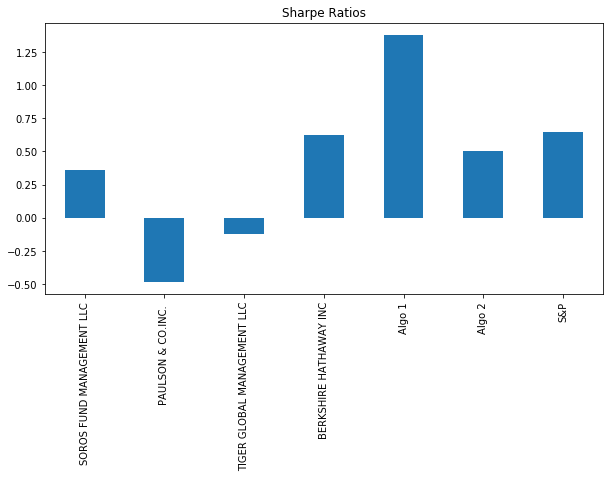

In [75]:
sharpe_ratios.plot(kind="bar", figsize=(10,5), title="Sharpe Ratios")
# this cell satisfying WAC 27, and the table below is a match with the homework

In [76]:
"""
WAT 5
(After all, if you could invest in one of two portfolios, 
each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)
Yes, the student author would take the portfolio with the lower risk.

WAT 6
On the basis of this performance metric, 
do our algo strategies outperform both 'the market' and the whales? Type your answer here:
It seems like Algo 1 outperforms both the S&P and all of the whales,
but it also looks like Algo 2 itself underperforms compared with the S&P and Berkshire.
"""

"\nWAT 5\n(After all, if you could invest in one of two portfolios, \neach offered the same 10% return, yet one offered lower risk, you'd take that one, right?)\nYes, the student author would take the portfolio with the lower risk.\n\nWAT 6\nOn the basis of this performance metric, \ndo our algo strategies outperform both 'the market' and the whales? Type your answer here:\nIt seems like Algo 1 outperforms both the S&P and all of the whales,\nbut it also looks like Algo 2 itself underperforms compared with the S&P and Berkshire.\n"

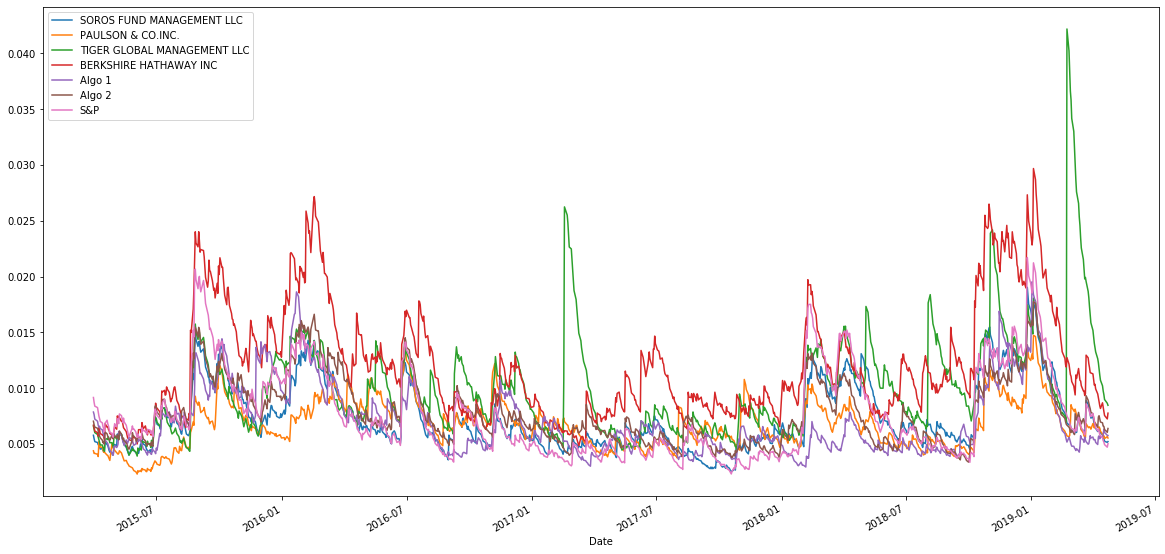

In [77]:
# rolling window w exp wt ma
exp_wt_ma = combination_frame.ewm(span=21, min_periods=21).std()
exp_wt_ma.plot(figsize=(20,10))
# table below is trying to follow old instructions before modification of Instructors and new post by Instructor KS...

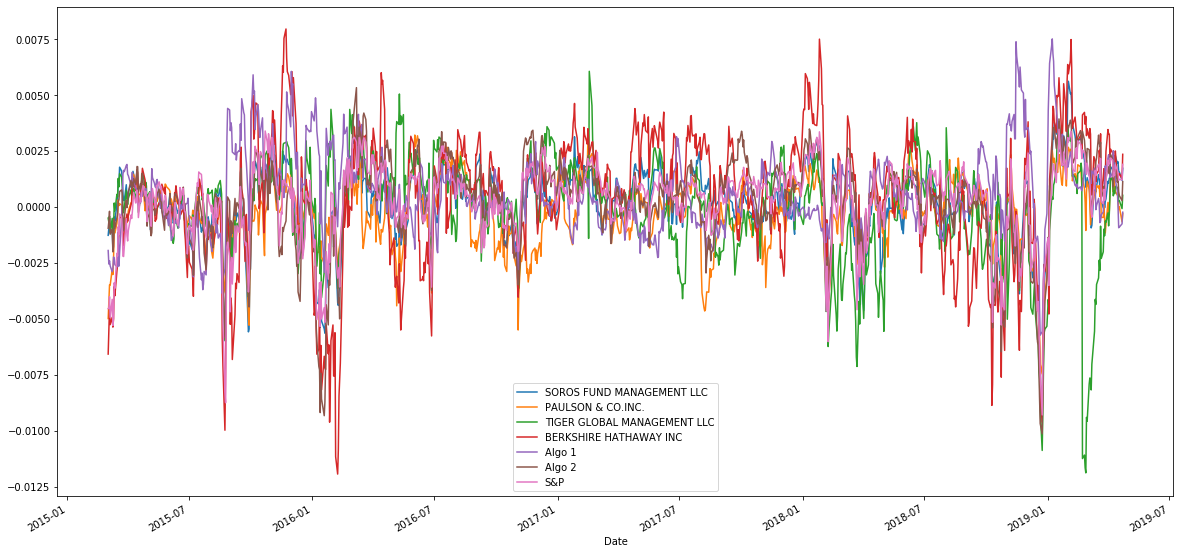

In [78]:
class_modifier = combination_frame.ewm(span=21, adjust=False).mean().plot(figsize=(20,10))
# graph below constructed and looks like posted answer from Instructor KS
# graph below answering WAC 25, modified question with posted answer by Instructor KS

In [79]:
# Read in CSV data
#Make sure you change the csv_path below to grab the right location of your data!
# bsx_path = Path('C:/Users/Frank/Downloads/BSX.csv')
# BOSTON SCIENTIFIC is BSX
bsx_ticker_data = pd.read_csv(bsx_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
bsx_ticker_data.head()
# satisfying WAC 28-30, student author using four (4) stocks...

,Close
Date,
2017-05-15,26.42
2017-05-16,26.48
2017-05-17,25.94
2017-05-18,26.14
2017-05-19,26.41


In [80]:
# Read in CSV data
#Make sure you change the csv_path below to grab the right location of your data!
# abt_path = Path('C:/Users/Frank/Downloads/ABT.csv')
# ABBOTT LABS IS ABT
abt_ticker_data = pd.read_csv(abt_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
abt_ticker_data.head()
# satisfying WAC 28-30, student author using four (4) stocks...

,Close
Date,
2017-05-15,44.04
2017-05-16,43.69
2017-05-17,43.08
2017-05-18,42.98
2017-05-19,43.16


In [81]:
# Read in CSV data
#Make sure you change the csv_path below to grab the right location of your data!
# ibm_path = Path('C:/Users/Frank/Downloads/IBM.csv')
# International Business Machines is IBM
ibm_ticker_data = pd.read_csv(ibm_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
ibm_ticker_data.head()
# satisfying WAC 28-30, student author using four (4) stocks...

,Close
Date,
2017-05-15,151.51
2017-05-16,153.68
2017-05-17,150.93
2017-05-18,150.78
2017-05-19,151.98


In [82]:
# Read in CSV data
#Make sure you change the csv_path below to grab the right location of your data!
# mrk_path = Path('C:/Users/Frank/Downloads/MRK.csv')
# Merck is MRK
mrk_ticker_data = pd.read_csv(mrk_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
mrk_ticker_data.head()
# satisfying WAC 28-30, student author using four (4) stocks...

,Close
Date,
2017-05-15,63.51
2017-05-16,63.79
2017-05-17,63.00
2017-05-18,63.89
2017-05-19,63.78


In [83]:
combo_df = pd.concat([bsx_ticker_data, abt_ticker_data, ibm_ticker_data, mrk_ticker_data], axis="columns", join="inner") 
combo_df
# leveraging pivot command
#joining_prices = pd.concat([bsx_path, abt_path, ibm_path, mrk_path], axis="rows", join="inner")
#joining_prices = joining_prices.reset_index()
#joining_prices = joining_prices.pivot_table(values="Close", index="Date")
#joining_prices.head()
#combo_df = combo_df.reset_index()
#combo_df = combo_df.pivo_table(values="Close", index="Date")
#combo_df.head()
# satisfying WAC 31

,Close,Close,Close,Close
Date,,,,
2017-05-15,26.42,44.04,151.51,63.51
2017-05-16,26.48,43.69,153.68,63.79
2017-05-17,25.94,43.08,150.93,63.00
2017-05-18,26.14,42.98,150.78,63.89
2017-05-19,26.41,43.16,151.98,63.78
...,...,...,...,...
2020-05-08,38.18,93.70,122.99,76.40
2020-05-11,37.78,96.07,122.59,77.91
2020-05-12,36.98,93.80,120.26,77.19


In [84]:
# leveraging pivot command
#joining_prices = pd.concat([bsx_path, abt_path, ibm_path, mrk_path], axis="rows", join="inner")
#joining_prices = joining_prices.reset_index()
#joining_prices = joining_prices.pivot_table(values="Close", index="Date")
#joining_prices.head()

In [85]:
combo_df = combo_df.reset_index()
combo_df = combo_df.pivot_table(values="Close", index="Date")
combo_df.head()
# satisfying WAC 32
# pivot satisfying WAC 33

,Close,Close,Close,Close
Date,,,,
2017-05-15,26.42,44.04,151.51,63.51
2017-05-16,26.48,43.69,153.68,63.79
2017-05-17,25.94,43.08,150.93,63.00
2017-05-18,26.14,42.98,150.78,63.89
2017-05-19,26.41,43.16,151.98,63.78


In [86]:
#joining_prices = pd.concat([bsx_ticker_data, abt_ticker_data, ibm_ticker_data, mrk_ticker_data], axis="rows", join="inner")
#joining_prices = joining_prices.reset_index()
#joining_prices = joining_prices.pivot_table(values="Close", index="Date")
#joining_prices.head()

In [87]:
new_cols = ["BSX", "ABT", "IBM", "MRK"]
combo_df.columns = new_cols
combo_df = combo_df.sort_index()

In [88]:
combo_df.isnull().sum() 
# there are no nulls for this data frame...

BSX    0
ABT    0
IBM    0
MRK    0
dtype: int64

In [89]:
frank_combo_returns = combo_df.pct_change()
frank_combo_returns = frank_combo_returns.sort_index()
# this cell satisfying WAC 33

In [90]:
combo_df

,BSX,ABT,IBM,MRK
Date,,,,
2017-05-15,26.42,44.04,151.51,63.51
2017-05-16,26.48,43.69,153.68,63.79
2017-05-17,25.94,43.08,150.93,63.00
2017-05-18,26.14,42.98,150.78,63.89
2017-05-19,26.41,43.16,151.98,63.78
...,...,...,...,...
2020-05-08,38.18,93.70,122.99,76.40
2020-05-11,37.78,96.07,122.59,77.91
2020-05-12,36.98,93.80,120.26,77.19


In [91]:
frank_combo_returns

,BSX,ABT,IBM,MRK
Date,,,,
2017-05-15,NaN,NaN,NaN,NaN
2017-05-16,0.002271,-0.007947,0.014322,0.004409
2017-05-17,-0.020393,-0.013962,-0.017894,-0.012384
2017-05-18,0.007710,-0.002321,-0.000994,0.014127
2017-05-19,0.010329,0.004188,0.007959,-0.001722
...,...,...,...,...
2020-05-08,0.031892,-0.003085,0.014518,0.010582
2020-05-11,-0.010477,0.025293,-0.003252,0.019764
2020-05-12,-0.021175,-0.023629,-0.019006,-0.009241


In [92]:
frank_combo_returns.isnull().sum()

BSX    1
ABT    1
IBM    1
MRK    1
dtype: int64

In [93]:
frank_combo_returns.dropna(inplace=True) 
#dropping nulls in this cell, and having to drop nulls changes the numbers compared with the table above slightly...
# dropping nulls satisfies WAC 34

In [94]:
frank_combo_returns

,BSX,ABT,IBM,MRK
Date,,,,
2017-05-16,0.002271,-0.007947,0.014322,0.004409
2017-05-17,-0.020393,-0.013962,-0.017894,-0.012384
2017-05-18,0.007710,-0.002321,-0.000994,0.014127
2017-05-19,0.010329,0.004188,0.007959,-0.001722
2017-05-22,0.014767,0.013207,0.004343,0.004077
...,...,...,...,...
2020-05-08,0.031892,-0.003085,0.014518,0.010582
2020-05-11,-0.010477,0.025293,-0.003252,0.019764
2020-05-12,-0.021175,-0.023629,-0.019006,-0.009241


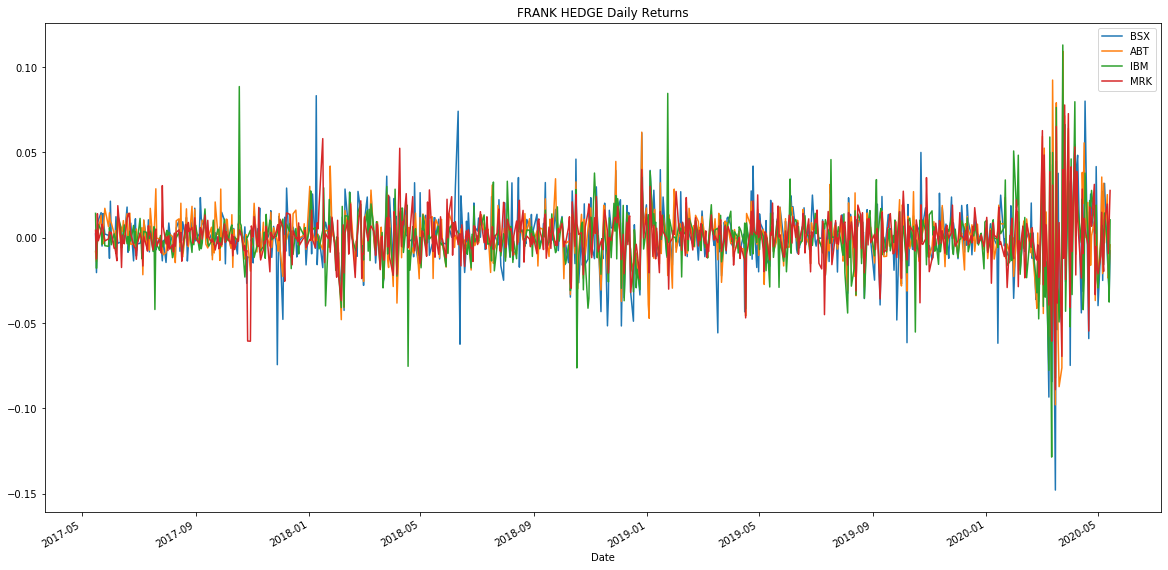

In [95]:
frank_combo_returns.plot(figsize=(20,10), title="FRANK HEDGE Daily Returns") #adding space
#plot of my own FRANK HEDGE Daily Returns

In [96]:
weights = [0.25, 0.25, 0.25, 0.25]
frank_hedge = frank_combo_returns.dot(weights)
# weighted returns here satisfying WAC 35

In [97]:
frank_hedge

Date
2017-05-16    0.003264
2017-05-17   -0.016158
2017-05-18    0.004630
2017-05-19    0.005188
2017-05-22    0.009098
                ...   
2020-05-08    0.013477
2020-05-11    0.007832
2020-05-12   -0.018263
2020-05-13   -0.019701
2020-05-14    0.006650
Length: 755, dtype: float64

In [98]:
whales_vs_rivals = pd.concat([combination_frame, frank_hedge], axis="columns", join="inner")
whales_vs_rivals

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,0
Date,,,,,,,,
2017-05-16,-0.001710,-0.003587,-0.005241,0.011088,-0.005181,-0.001743,-0.000687,0.003264
2017-05-17,-0.016729,-0.012780,0.004089,-0.025685,0.002542,-0.019643,-0.018178,-0.016158
2017-05-18,0.001814,-0.006997,0.006550,0.004359,-0.003024,-0.000620,0.003687,0.004630
2017-05-19,0.005603,0.003113,0.003162,0.014716,-0.001223,0.009527,0.006767,0.005188
2017-05-22,0.004876,0.000967,0.008776,0.010676,-0.003682,0.005009,0.005160,0.009098
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.015390
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.042284
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004723


In [99]:
whales_vs_rivals = whales_vs_rivals.rename(columns={0:"FRANK HEDGE FUND"})
whales_vs_rivals
# satisfying WAC 36 in this cell, satisfying WAC 37 in this cell (NaNs all dropped already...)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,FRANK HEDGE FUND
Date,,,,,,,,
2017-05-16,-0.001710,-0.003587,-0.005241,0.011088,-0.005181,-0.001743,-0.000687,0.003264
2017-05-17,-0.016729,-0.012780,0.004089,-0.025685,0.002542,-0.019643,-0.018178,-0.016158
2017-05-18,0.001814,-0.006997,0.006550,0.004359,-0.003024,-0.000620,0.003687,0.004630
2017-05-19,0.005603,0.003113,0.003162,0.014716,-0.001223,0.009527,0.006767,0.005188
2017-05-22,0.004876,0.000967,0.008776,0.010676,-0.003682,0.005009,0.005160,0.009098
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.015390
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.042284
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004723


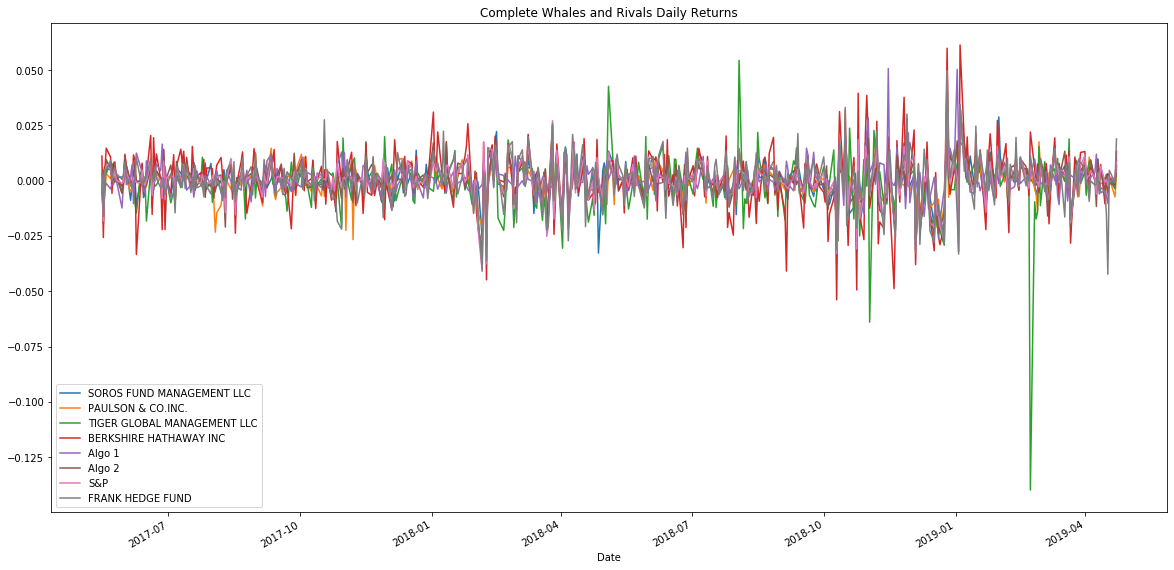

In [100]:
complete_daily_returns = whales_vs_rivals.plot(figsize=(20,10), title="Complete Whales and Rivals Daily Returns")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,FRANK HEDGE FUND
Date,,,,,,,,
2017-05-16,0.998290,0.996413,0.994759,1.011088,0.994819,0.998257,0.999313,1.003264
2017-05-17,0.981589,0.983678,0.998827,0.985119,0.997348,0.978648,0.981147,0.987053
2017-05-18,0.983369,0.976796,1.005369,0.989413,0.994332,0.978042,0.984765,0.991623
2017-05-19,0.988879,0.979837,1.008548,1.003973,0.993116,0.987359,0.991429,0.996768
2017-05-22,0.993701,0.980784,1.017399,1.014692,0.989460,0.992305,0.996545,1.005837
...,...,...,...,...,...,...,...,...
2019-04-16,1.059281,0.906907,0.632700,1.333556,1.391634,1.155412,1.210105,1.316084
2019-04-17,1.056212,0.901042,0.629910,1.337853,1.377298,1.149372,1.207354,1.260434
2019-04-18,1.057742,0.902143,0.630277,1.340417,1.376489,1.147959,1.209260,1.266388


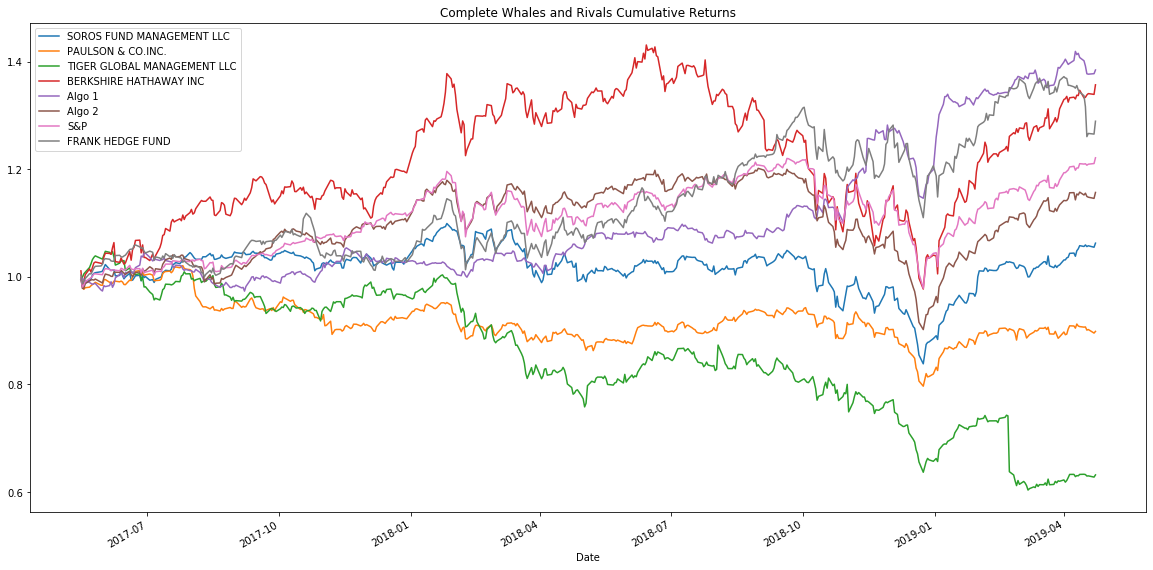

In [101]:
# https://stackoverflow.com/questions/40811246/pandas-cumulative-return-function
complete_cumu_returns = (1 + whales_vs_rivals).cumprod()
complete_cumu_returns_graph = complete_cumu_returns.plot(figsize=(20,10), title="Complete Whales and Rivals Cumulative Returns")
complete_cumu_returns_graph
complete_cumu_returns

In [102]:
"""
WAT 7
It was hard to tell from the graph, but the table clearly indicates that the FRANK HEDGE FUND 
brought the third highest cumulative
returns, Algo 1 brought the most, and Berkshire brought the second most...

"""

'\nWAT 7\nIt was hard to tell from the graph, but the table clearly indicates that the FRANK HEDGE FUND \nbrought the third highest cumulative\nreturns, Algo 1 brought the most, and Berkshire brought the second most...\n\n'

In [103]:
"""
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. 
How does your portfolio fair?

Based on the returns and from what the student-author can tell, only Berkshire and one of the Algos does better... it's
hard to tell based on the colors, but it looks like the FRANK HEDGE account does third best in terms of cumulative returns...


"""

"\n5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. \nHow does your portfolio fair?\n\nBased on the returns and from what the student-author can tell, only Berkshire and one of the Algos does better... it's\nhard to tell based on the colors, but it looks like the FRANK HEDGE account does third best in terms of cumulative returns...\n\n\n"

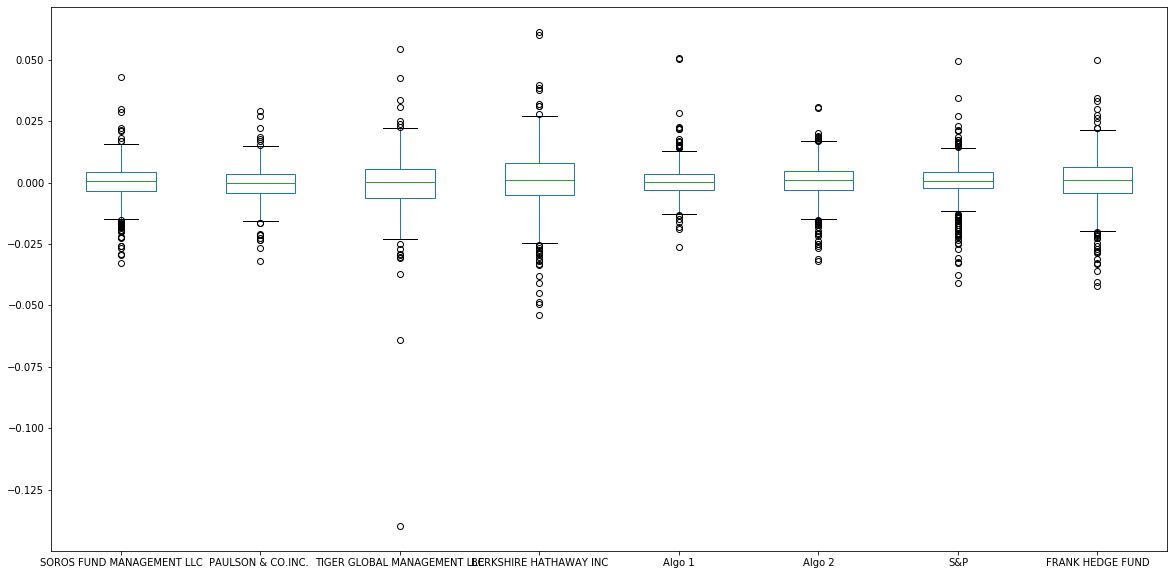

In [104]:
whales_vs_rivals.plot.box(figsize=(20,10))

In [105]:
"""

from the look of the graph above, paulson and Algo 1 have the smallest spread, but only by looking at the 
values below can someone tell that Algo 1 has smaller standard deviation. FRANK HEDGE FUND has a large 
standard deviation...
"""

'\n\nfrom the look of the graph above, paulson and Algo 1 have the smallest spread, but only by looking at the \nvalues below can someone tell that Algo 1 has smaller standard deviation. FRANK HEDGE FUND has a large \nstandard deviation...\n'

In [106]:
complete_daily_standard_dev = whales_vs_rivals.std()
complete_daily_standard_dev
# complete standard deviation is the complete risk, this cell satisfies WAC 38

SOROS FUND MANAGEMENT LLC      0.008294
PAULSON & CO.INC.              0.006995
TIGER GLOBAL MANAGEMENT LLC    0.012124
BERKSHIRE HATHAWAY INC         0.013240
Algo 1                         0.006946
Algo 2                         0.007866
S&P                            0.008694
FRANK HEDGE FUND               0.010379
dtype: float64

In [107]:
"""
WAT 7
Algo 1 has the smallest standard deviation, and FRANK HEDGE FUND has the third largest standard deviation

"""

'\nWAT 7\nAlgo 1 has the smallest standard deviation, and FRANK HEDGE FUND has the third largest standard deviation\n\n'

In [108]:
complete_risker = complete_daily_standard_dev["S&P"]

In [109]:
complete_daily_standard_dev > complete_risker
#trying to find out what is riskier than S&P
# from https://www.e-education.psu.edu/geog489/book/export/html/2047 
# re-running risk with FRANK HEDGE FUND, this cell satisfies WAC 38
# FRANK HEDGE FUND, TIGER, and BERKSHIRE are all riskier than the S&P 500...

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P                            False
FRANK HEDGE FUND                True
dtype: bool

In [110]:
daily_standard_dev > risker 
# restoring this cell and data for comparison with complete risker
#trying to find out what is riskier than S&P
# from https://www.e-education.psu.edu/geog489/book/export/html/2047 

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P                            False
dtype: bool

In [111]:
# annualized std
annualized_std = daily_standard_dev * np.sqrt(252)
annualized_std
# numbers below match table exactly...

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P                            0.135786
dtype: float64

In [112]:
complete_annualized_std = complete_daily_standard_dev*np.sqrt(252)
complete_annualized_std

SOROS FUND MANAGEMENT LLC      0.131659
PAULSON & CO.INC.              0.111039
TIGER GLOBAL MANAGEMENT LLC    0.192458
BERKSHIRE HATHAWAY INC         0.210185
Algo 1                         0.110257
Algo 2                         0.124867
S&P                            0.138016
FRANK HEDGE FUND               0.164764
dtype: float64

In [113]:
"""
WAT 7
Because annualized is multiplying everything by the same constant, FRANK HEDGE FUND is still the 
third highest in terms of standard deviation and therefore the third riskiest...

"""

'\nWAT 7\nBecause annualized is multiplying everything by the same constant, FRANK HEDGE FUND is still the \nthird highest in terms of standard deviation and therefore the third riskiest...\n\n'

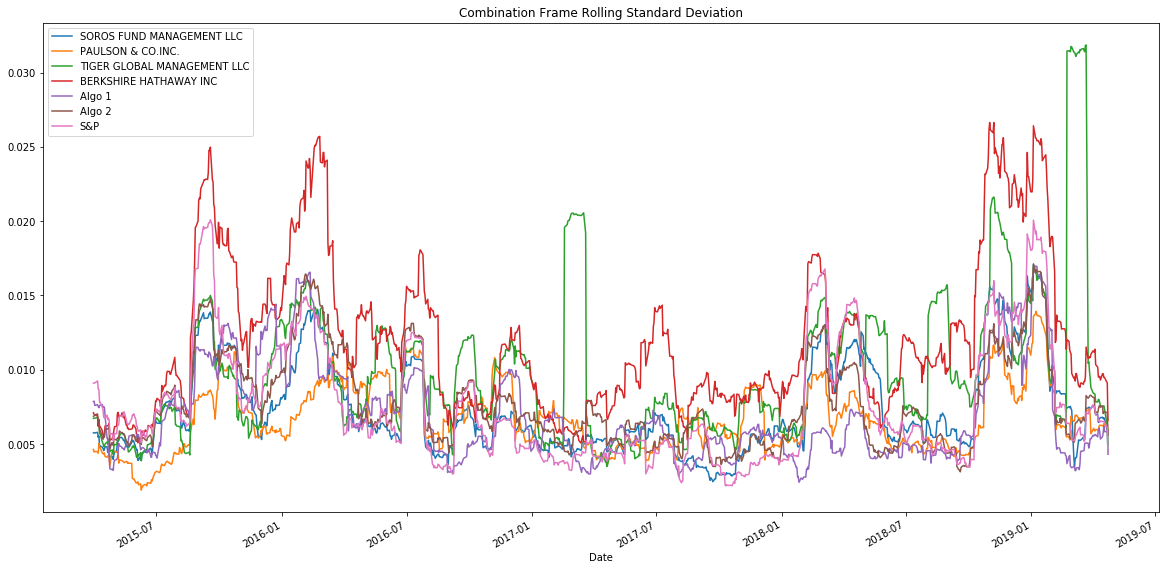

In [114]:
combination_frame_rolling = combination_frame.rolling(window=21).std()
combination_frame_rolling.plot(figsize=(20,10), title="Combination Frame Rolling Standard Deviation")


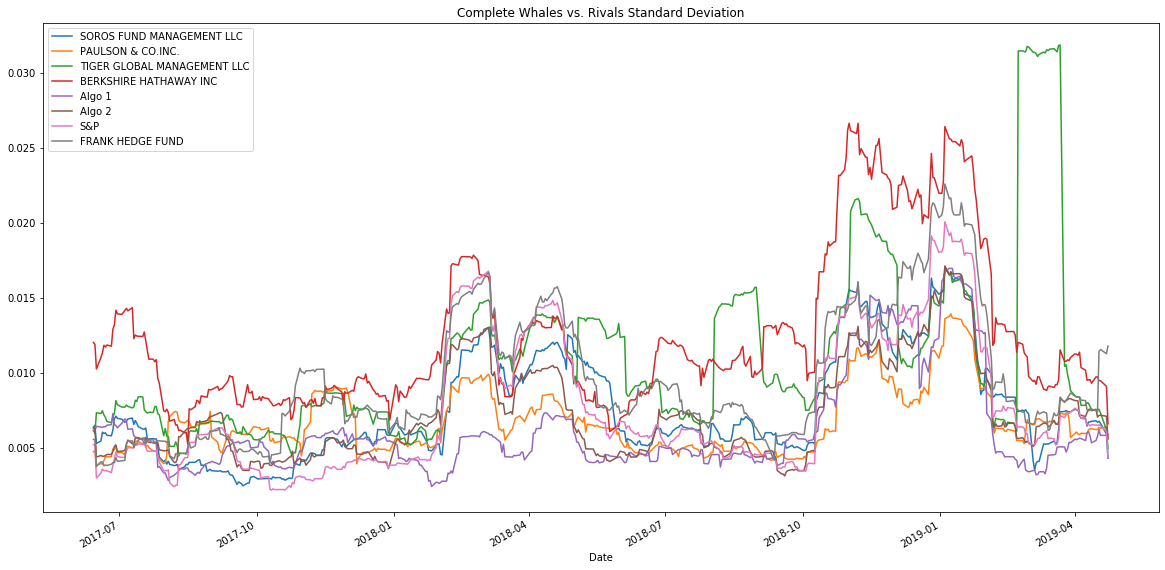

In [115]:
complete_rolling = whales_vs_rivals.rolling(window=21).std()
complete_rolling.plot(figsize=(20,10), title="Complete Whales vs. Rivals Standard Deviation")
# this cell is satisfying WAC 39, rolling for all, including FRANK HEDGE FUND

In [116]:
"""
WAT 7
FRANK HEDGE FUND seems to follow the S&P in direction, but on a lower scale...
"""

'\nWAT 7\nFRANK HEDGE FUND seems to follow the S&P in direction, but on a lower scale...\n'

In [117]:
correlation_table = combination_frame.corr()
correlation_table
# constructing correlation table, numbers match...

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [118]:
complete_correlation_table = whales_vs_rivals.corr()
complete_correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,FRANK HEDGE FUND
SOROS FUND MANAGEMENT LLC,1.000000,0.716768,0.509435,0.769897,0.283537,0.804563,0.822418,0.630396
PAULSON & CO.INC.,0.716768,1.000000,0.465363,0.588473,0.306118,0.739337,0.718028,0.588077
TIGER GLOBAL MANAGEMENT LLC,0.509435,0.465363,1.000000,0.375126,0.111082,0.465311,0.553959,0.449140
BERKSHIRE HATHAWAY INC,0.769897,0.588473,0.375126,1.000000,0.257661,0.748434,0.811770,0.623103
Algo 1,0.283537,0.306118,0.111082,0.257661,1.000000,0.291210,0.248246,0.191631
Algo 2,0.804563,0.739337,0.465311,0.748434,0.291210,1.000000,0.871745,0.672848
S&P,0.822418,0.718028,0.553959,0.811770,0.248246,0.871745,1.000000,0.801059
FRANK HEDGE FUND,0.630396,0.588077,0.449140,0.623103,0.191631,0.672848,0.801059,1.000000


In [119]:
# redoing beta for Berkshire vs S$P 500 for whales vs rivals
complete_berkshire_covariance = whales_vs_rivals["BERKSHIRE HATHAWAY INC"].cov(whales_vs_rivals["S&P"])
complete_berkshire_variance = whales_vs_rivals["S&P"].var()
complete_berkshire_beta = complete_berkshire_covariance/complete_berkshire_variance
print(complete_berkshire_covariance)
print(complete_berkshire_variance)
complete_berkshire_beta
# need to check above

9.344668855182714e-05
7.558887516267113e-05


1.2362492278225476

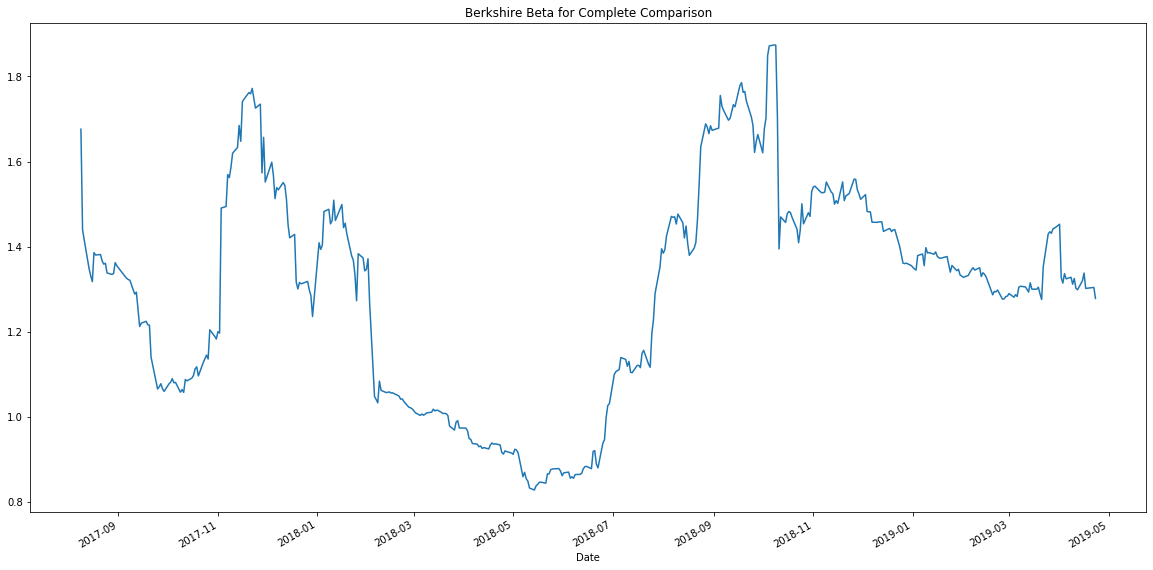

In [120]:

complete_berkshire_covariance = whales_vs_rivals["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whales_vs_rivals["S&P"])
complete_berkshire_variance = whales_vs_rivals["S&P"].rolling(window=60).var()
complete_berkshire_beta = complete_berkshire_covariance/complete_berkshire_variance
complete_berkshire_beta.plot(figsize=(20,10), title="Berkshire Beta for Complete Comparison")
# thanks to tutor, Ms. LT, looks almost exactly the same
#comparing Beta of Berkshire with S&P as example, trying to match homework

In [121]:
# beta for tiger vs S$P 500 in the complete data frame
complete_tiger_covariance = whales_vs_rivals["TIGER GLOBAL MANAGEMENT LLC"].cov(whales_vs_rivals["S&P"])
complete_tiger_variance = combination_frame["S&P"].var()
complete_tiger_beta = complete_tiger_covariance/complete_tiger_variance 
print(complete_tiger_covariance)
print(complete_tiger_variance)
complete_tiger_beta
# need to check above

5.8390468454046884e-05
7.316632424648712e-05


0.7980511397202018

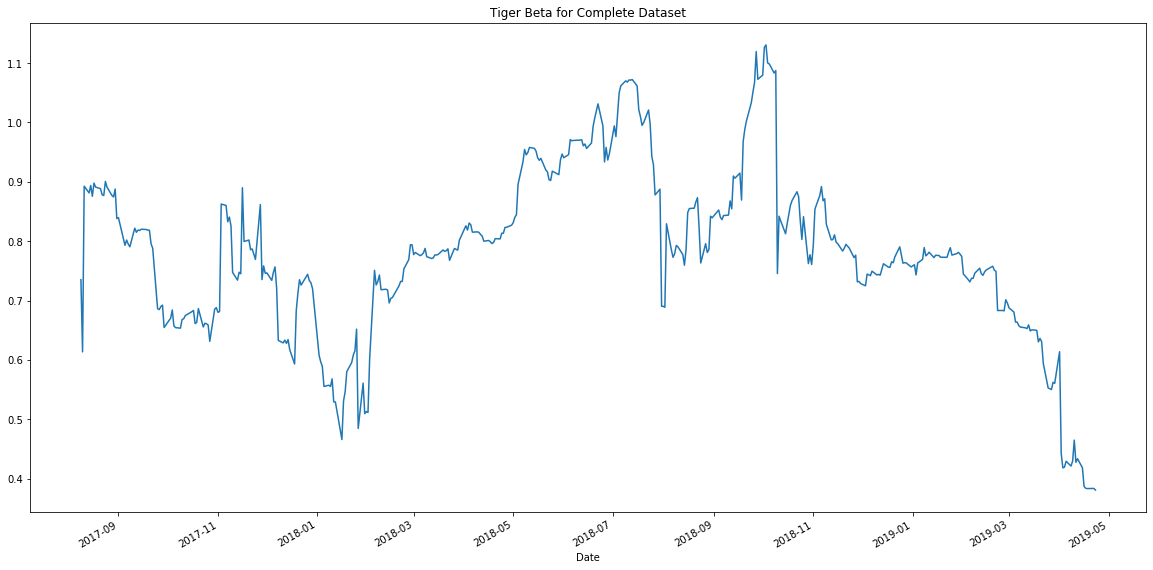

In [122]:

complete_tiger_covariance = whales_vs_rivals["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(whales_vs_rivals["S&P"])
complete_tiger_variance = whales_vs_rivals["S&P"].rolling(window=60).var()
complete_tiger_beta = complete_tiger_covariance/complete_tiger_variance
complete_tiger_beta.plot(figsize=(20,10), title="Tiger Beta for Complete Dataset")
# thanks to tutor, Ms. LT, looks almost exactly the same


In [123]:
# beta for tiger vs S$P 500 in the complete data frame
complete_frank_covariance = whales_vs_rivals["FRANK HEDGE FUND"].cov(whales_vs_rivals["S&P"])
complete_frank_variance = combination_frame["S&P"].var()
complete_frank_beta = complete_frank_covariance/complete_frank_variance 
print(complete_frank_covariance)
print(complete_frank_variance)
complete_frank_beta
# need to check above

7.228620606191667e-05
7.316632424648712e-05


0.987970993573417

In [124]:
"""
- Using your custom portfolio and one other of your choosing:
  - The plotted beta. . How does your portfolio fair?
  
Tiger is about .8, but FRANK HEDGE is about 1.0

"""

'\n- Using your custom portfolio and one other of your choosing:\n  - The plotted beta. . How does your portfolio fair?\n  \nTiger is about .8, but FRANK HEDGE is about 1.0\n\n'

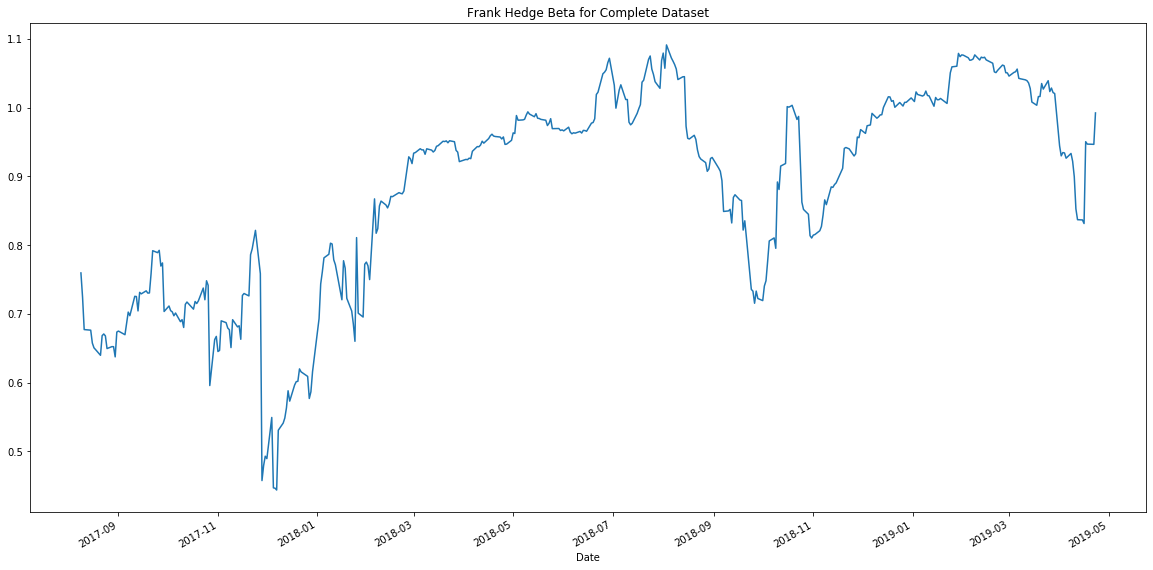

In [125]:

complete_frank_covariance = whales_vs_rivals["FRANK HEDGE FUND"].rolling(window=60).cov(whales_vs_rivals["S&P"])
complete_frank_variance = whales_vs_rivals["S&P"].rolling(window=60).var()
complete_frank_beta = complete_frank_covariance/complete_frank_variance
complete_frank_beta.plot(figsize=(20,10), title="Frank Hedge Beta for Complete Dataset")
# thanks to tutor, Ms. LT, looks almost exactly the same


In [126]:
"""
WAT 7
FRANK HEDGE FUND seems to be closer to to the S&P than Tiger, but FRANK HEDGE FUND is not as close to the S&P as Berkshire
"""

'\nWAT 7\nFRANK HEDGE FUND seems to be closer to to the S&P than Tiger, but FRANK HEDGE FUND is not as close to the S&P as Berkshire\n'

In [127]:
# calculating annulaized Sharpe ratios
complete_sharpe_ratios = (whales_vs_rivals.mean() * 252)/((whales_vs_rivals.std()) * (np.sqrt(252)))
complete_sharpe_ratios
# satisfying WAC 40, tabulating Sharpe ratios...

SOROS FUND MANAGEMENT LLC      0.304316
PAULSON & CO.INC.             -0.442445
TIGER GLOBAL MANAGEMENT LLC   -1.134034
BERKSHIRE HATHAWAY INC         0.856394
Algo 1                         1.581130
Algo 2                         0.666037
S&P                            0.818398
FRANK HEDGE FUND               0.880120
dtype: float64

In [128]:
# FRANK HEDGE FUND ranks second for Sharpe Ratio

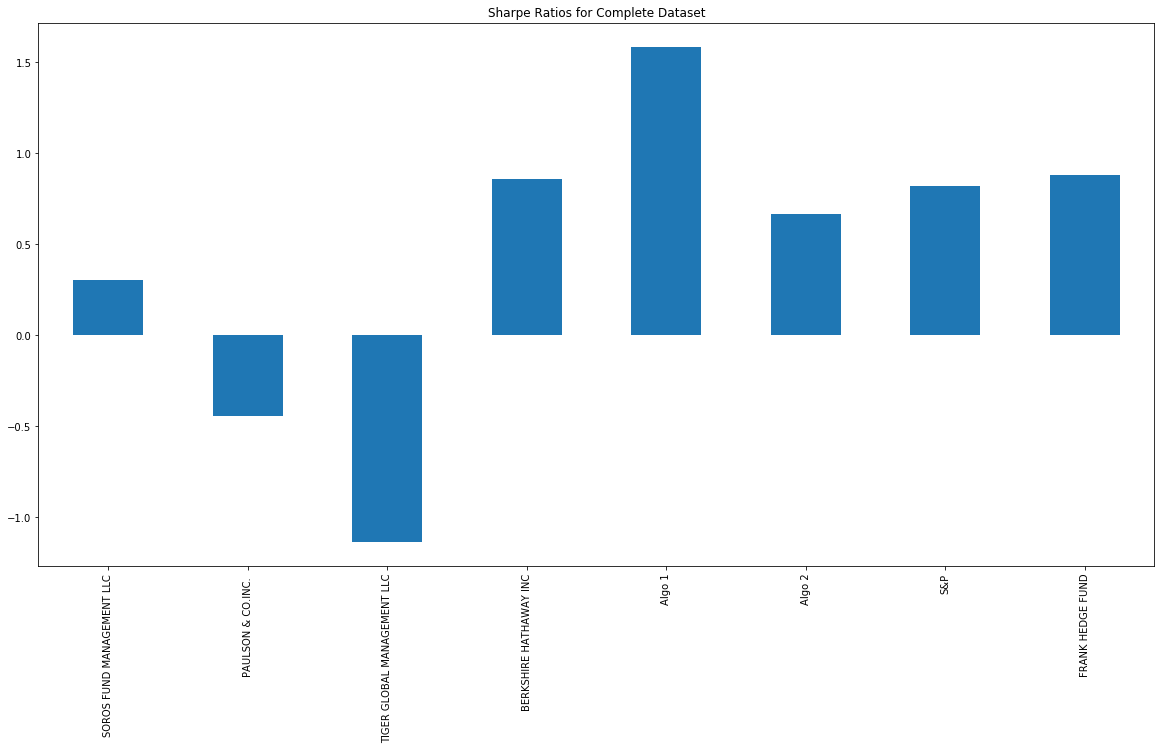

In [129]:
complete_sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios for Complete Dataset")
# satisfying WAC 41, Sharpe bar plot

In [130]:
"""
WAT 7
FRANK HEDGE FUND has the second best Sharpe ratio, but is still far behind Algo 1 in terms of Sharpe ratio...


"""

'\nWAT 7\nFRANK HEDGE FUND has the second best Sharpe ratio, but is still far behind Algo 1 in terms of Sharpe ratio...\n\n\n'

In [131]:
complete_correlation_table = whales_vs_rivals.corr()
complete_correlation_table
#satisfying WAC 42, make correlation table and include FRANK HEDGE FUND 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,FRANK HEDGE FUND
SOROS FUND MANAGEMENT LLC,1.000000,0.716768,0.509435,0.769897,0.283537,0.804563,0.822418,0.630396
PAULSON & CO.INC.,0.716768,1.000000,0.465363,0.588473,0.306118,0.739337,0.718028,0.588077
TIGER GLOBAL MANAGEMENT LLC,0.509435,0.465363,1.000000,0.375126,0.111082,0.465311,0.553959,0.449140
BERKSHIRE HATHAWAY INC,0.769897,0.588473,0.375126,1.000000,0.257661,0.748434,0.811770,0.623103
Algo 1,0.283537,0.306118,0.111082,0.257661,1.000000,0.291210,0.248246,0.191631
Algo 2,0.804563,0.739337,0.465311,0.748434,0.291210,1.000000,0.871745,0.672848
S&P,0.822418,0.718028,0.553959,0.811770,0.248246,0.871745,1.000000,0.801059
FRANK HEDGE FUND,0.630396,0.588077,0.449140,0.623103,0.191631,0.672848,0.801059,1.000000


In [132]:
# blue graphs below are comparison of beta, satisfy WAC 43

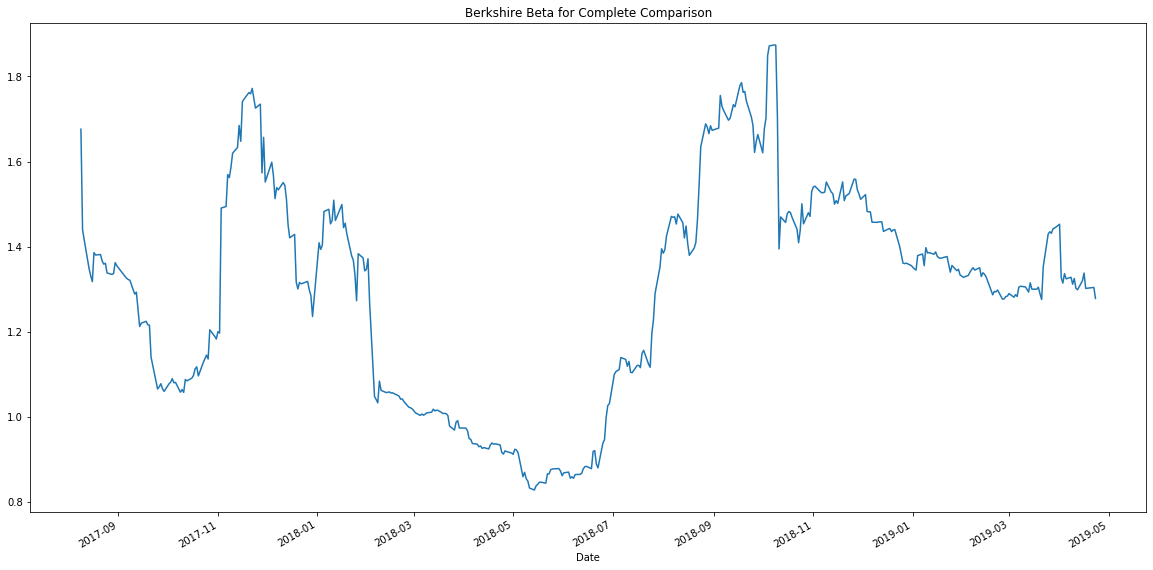

In [133]:

complete_berkshire_covariance = whales_vs_rivals["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whales_vs_rivals["S&P"])
complete_berkshire_variance = whales_vs_rivals["S&P"].rolling(window=60).var()
complete_berkshire_beta = complete_berkshire_covariance/complete_berkshire_variance
complete_berkshire_beta.plot(figsize=(20,10), title="Berkshire Beta for Complete Comparison")
# thanks to tutor, Ms. LT, looks almost exactly the same
#comparing Beta of Berkshire with S&P as example, trying to match homework

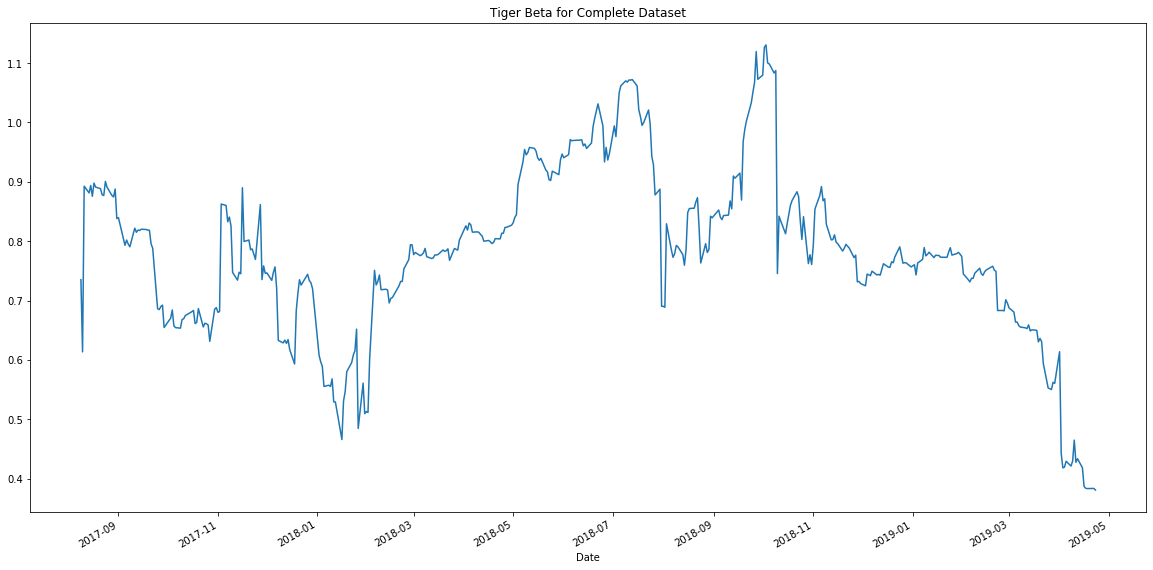

In [134]:

complete_tiger_covariance = whales_vs_rivals["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(whales_vs_rivals["S&P"])
complete_tiger_variance = whales_vs_rivals["S&P"].rolling(window=60).var()
complete_tiger_beta = complete_tiger_covariance/complete_tiger_variance
complete_tiger_beta.plot(figsize=(20,10), title="Tiger Beta for Complete Dataset")
# thanks to tutor, Ms. LT, looks almost exactly the same


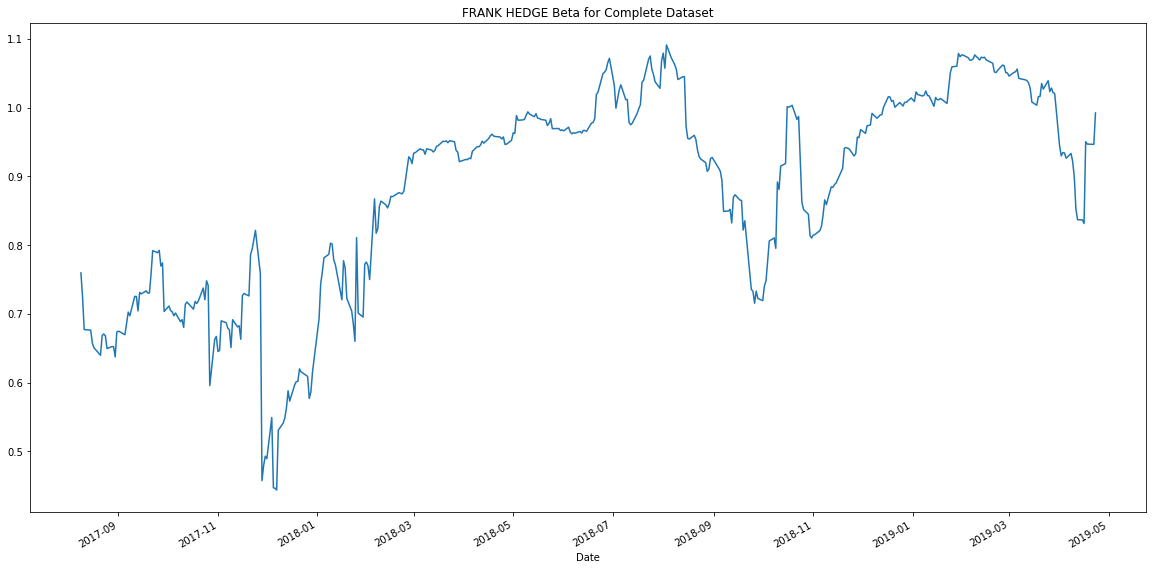

In [135]:

complete_frank_covariance = whales_vs_rivals["FRANK HEDGE FUND"].rolling(window=60).cov(whales_vs_rivals["S&P"])
complete_frank_variance = whales_vs_rivals["S&P"].rolling(window=60).var()
complete_frank_beta = complete_frank_covariance/complete_frank_variance
complete_frank_beta.plot(figsize=(20,10), title="FRANK HEDGE Beta for Complete Dataset")
# thanks to tutor, Ms. LT, looks almost exactly the same


In [136]:
#FRANK HEDGE FUND beta does not match S&P for same scale

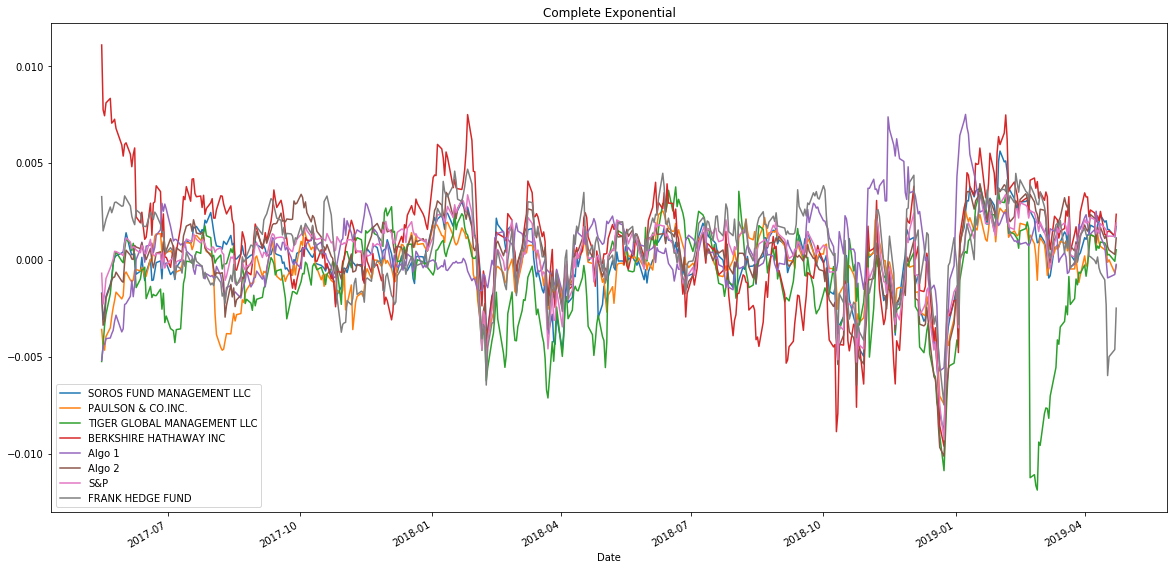

In [137]:
complete_class_modifier = whales_vs_rivals.ewm(span=21, adjust=False).mean().plot(figsize=(20,10), title="Complete Exponential")

In [138]:
"""

#


## Instructions


#### Performance Analysis

1. Calculate and plot cumulative returns. Does any portfolio outperform the S&P 500?

#### Risk Analysis

1. Create a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?

2. Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

3. Calculate the annualized standard deviation (252 trading days).

#### Rolling Statistics

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 using a 21 day rolling window. Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?

3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. 
Does the portfolio seem sensitive to movements in the S&P 500?

4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average.
This is like a moving window average, but it assigns greater importance to more recent observations. 
Try calculating the ewm with a 21 day half-life.

### Plot Sharpe Ratios

Investment managers and their institutional investors look at the return-to-risk ratio, not just the returns. 
(After all, if you have two portfolios that each offer a 10% return, yet one is lower risk, 
you would invest in the lower-risk portfolio, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.

2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

### Create Custom Portfolio

Harold is ecstatic that you were able to help him prove that the
algorithmic trading portfolios are doing so well compared to the market and whales'
portfolios. However, now you are wondering whether you can choose 
your own portfolio that performs just as well as the algorithmic portfolios. Investigate by doing the following:

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) 
and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.

2. Download the data as CSV files and calculate the portfolio returns.

3. Calculate the returns for each stock.

4. Using those returns, calculate the weighted returns for your
entire portfolio assuming an equal number of shares for each stock.

5. Add your portfolio returns to the DataFrame with the other
portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
  - The annualized standard deviation (252 trading days) for all portfolios.
  - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
  - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
  - A correlation table.
- Using your custom portfolio and one other of your choosing:
  - The plotted beta. . How does your portfolio fair?

---

## Reso
"""

"\n\n#\n\n\n## Instructions\n\n\n#### Performance Analysis\n\n1. Calculate and plot cumulative returns. Does any portfolio outperform the S&P 500?\n\n#### Risk Analysis\n\n1. Create a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?\n\n2. Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?\n\n3. Calculate the annualized standard deviation (252 trading days).\n\n#### Rolling Statistics\n\n1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 using a 21 day rolling window. Does the risk increase for each of the portfolios at the same time risk increases in the S&P?\n\n2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?\n\n3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. \nDoes the portfolio seem sensit

In [139]:
"""
Things to Do--
reproduce onto github file
collate answers to make everytgin as easy as possible on grader





"""

'\nThings to Do--\nreproduce onto github file\ncollate answers to make everytgin as easy as possible on grader\n\n\n\n\n\n'

In [140]:
# 1639 EDT